In [ ]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
train.shape

(800, 22)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
# Droping the 'ID' column as it's not useful for prediction
train_data_cleaned = train.drop(columns=['ID'])

In [ ]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

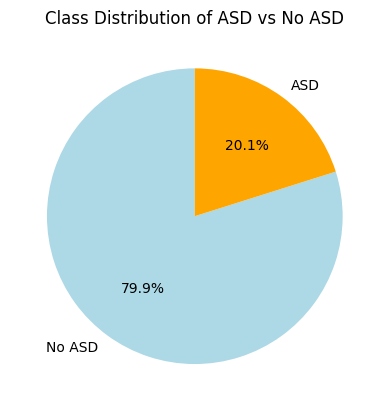

In [ ]:
#Visualizing the target variable - Class/ASD
labels = ['No ASD', 'ASD']
plt.pie(train_data_cleaned['Class/ASD'].value_counts().values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Class Distribution of ASD vs No ASD')
plt.show()


In [ ]:
# Encoding categorical features
label_encoders = {}
categorical_columns = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']

for column in categorical_columns:
    le = LabelEncoder()
    train_data_cleaned[column] = le.fit_transform(train_data_cleaned[column])
    label_encoders[column] = le

In [ ]:
# Separating features and target
X = train_data_cleaned.drop(columns=['Class/ASD'])
y = train_data_cleaned['Class/ASD']

In [ ]:
# Spliting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced' ,random_state=42)

In [ ]:
# SVM
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale',class_weight='balanced', random_state=42)

In [ ]:
# Logistic Regression
log_reg_classifier = LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', class_weight='balanced', random_state=42)

In [ ]:
# Neural Network (MLP)
nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500,
                              random_state=42, early_stopping=True, n_iter_no_change=10, validation_fraction=0.1)

In [ ]:
# Training and evaluating each model
models = {
    'Random Forest': rf_classifier,
    'SVM': svm_classifier,
    'Logistic Regression': log_reg_classifier,
    'Neural Network': nn_classifier
}

accuracy_results = {}
confusion_matrices = {}
classification_reports = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_val, y_pred)
    classification_reports[model_name] = classification_report(y_val, y_pred)
    accuracy_results[model_name] = accuracy


for model_name in models:
    print(f"Model: {model_name}")
    print("Accuracy =", accuracy_results[model_name] * 100)
    print("Confusion Matrix")
    print(confusion_matrices[model_name])
    print("Classification Report")
    print(classification_reports[model_name])
    print("\n")

Model: Random Forest
Accuracy = 85.625
Confusion Matrix
[[114  10]
 [ 13  23]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       124
           1       0.70      0.64      0.67        36

    accuracy                           0.86       160
   macro avg       0.80      0.78      0.79       160
weighted avg       0.85      0.86      0.85       160



Model: SVM
Accuracy = 80.625
Confusion Matrix
[[98 26]
 [ 5 31]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       124
           1       0.54      0.86      0.67        36

    accuracy                           0.81       160
   macro avg       0.75      0.83      0.77       160
weighted avg       0.86      0.81      0.82       160



Model: Logistic Regression
Accuracy = 82.5
Confusion Matrix
[[101  23]
 [  5  31]]
Classification Report
              precision    recall  f1-score   sup

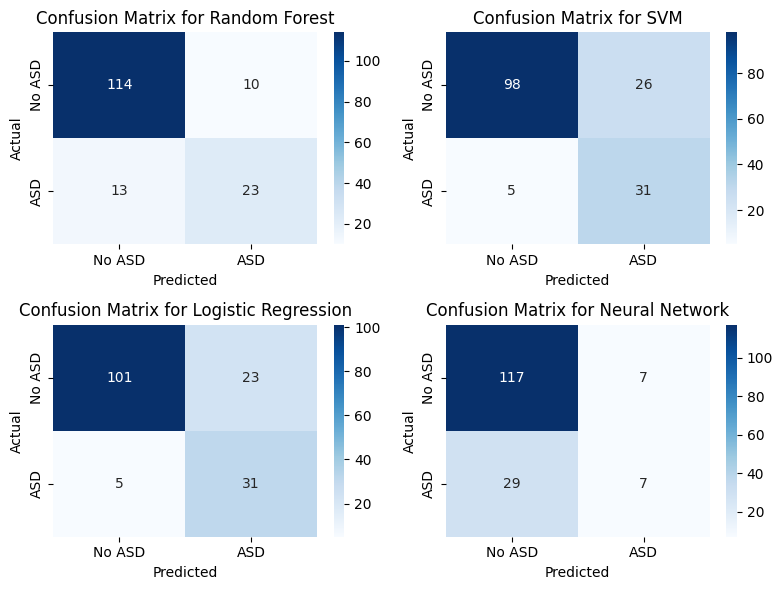

In [ ]:
# Visualizing the confusion matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(ax, cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No ASD', 'ASD'], yticklabels=['No ASD', 'ASD'], ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

fig, axes = plt.subplots(2, 2, figsize=(8,6))

for ax, (model_name, cm) in zip(axes.ravel(), confusion_matrices.items()):
    plot_confusion_matrix(ax, cm, model_name)

plt.tight_layout()
plt.show()

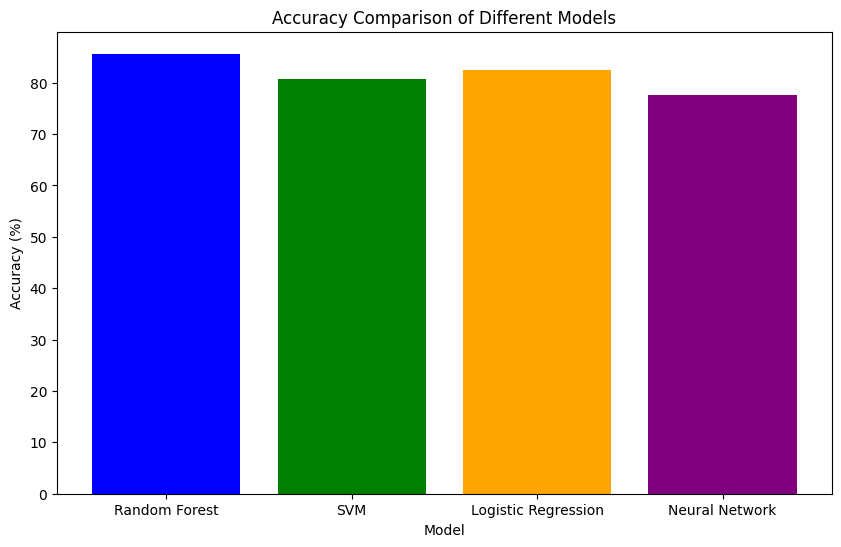

In [ ]:
#Comparison of accuracies through Plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), [acc * 100 for acc in accuracy_results.values()], color=['blue', 'green', 'orange', 'purple'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.show()